In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

In [2]:
model_1 = pd.read_csv("./data/processed_model01.csv")
model_2 = pd.read_csv("./data/processed_model02.csv")
model_3 = pd.read_csv("./data/processed_model03.csv")
model_4 = pd.read_csv("./data/processed_model04.csv")
model_5 = pd.read_csv("./data/processed_model05.csv")

In [3]:
datasets = [model_1, model_2, model_3, model_4, model_5]
names = ["model_1", "model_2", "model_3", "model_4", "model_5"]

## Correlation Analysis

Correlation Analysis for model_1:
                    Feature  Absolute Correlation Correlation Sign
0           predicted_label              1.000000                +
1                    status              0.550483                -
2               credit_risk              0.407945                +
3                  duration              0.378359                +
4            credit_history              0.369602                -
5             savings/bonds              0.316456                -
6                  property              0.264617                +
7             credit_amount              0.246435                +
8       employment_duration              0.198245                -
9                   purpose              0.163120                +
10  personal_status_and_sex              0.155371                -
11        number_of_credits              0.139990                -
12           marital_status              0.123810                +
13                      age 

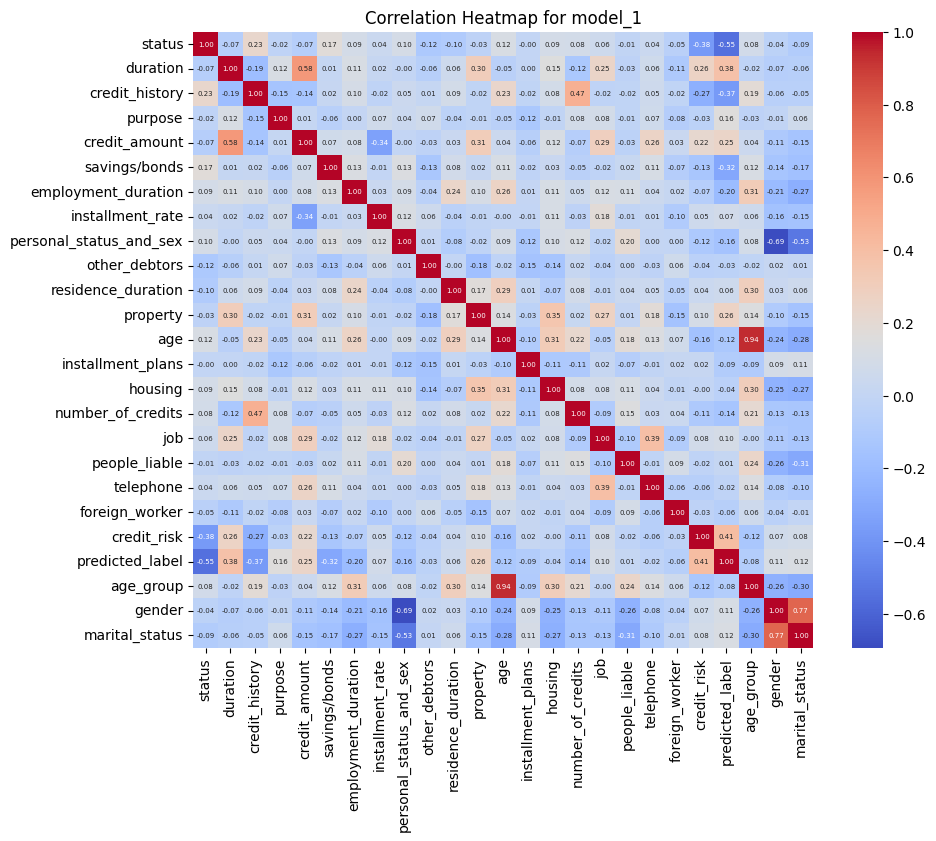

Correlation Analysis for model_2:
                    Feature  Absolute Correlation Correlation Sign
0           predicted_label              1.000000                +
1                    status              0.550483                -
2               credit_risk              0.407945                +
3                  duration              0.378359                +
4            credit_history              0.369602                -
5             savings/bonds              0.316456                -
6                  property              0.264617                +
7             credit_amount              0.246435                +
8       employment_duration              0.198245                -
9                   purpose              0.163120                +
10  personal_status_and_sex              0.155371                -
11        number_of_credits              0.139990                -
12           marital_status              0.123810                +
13                      age 

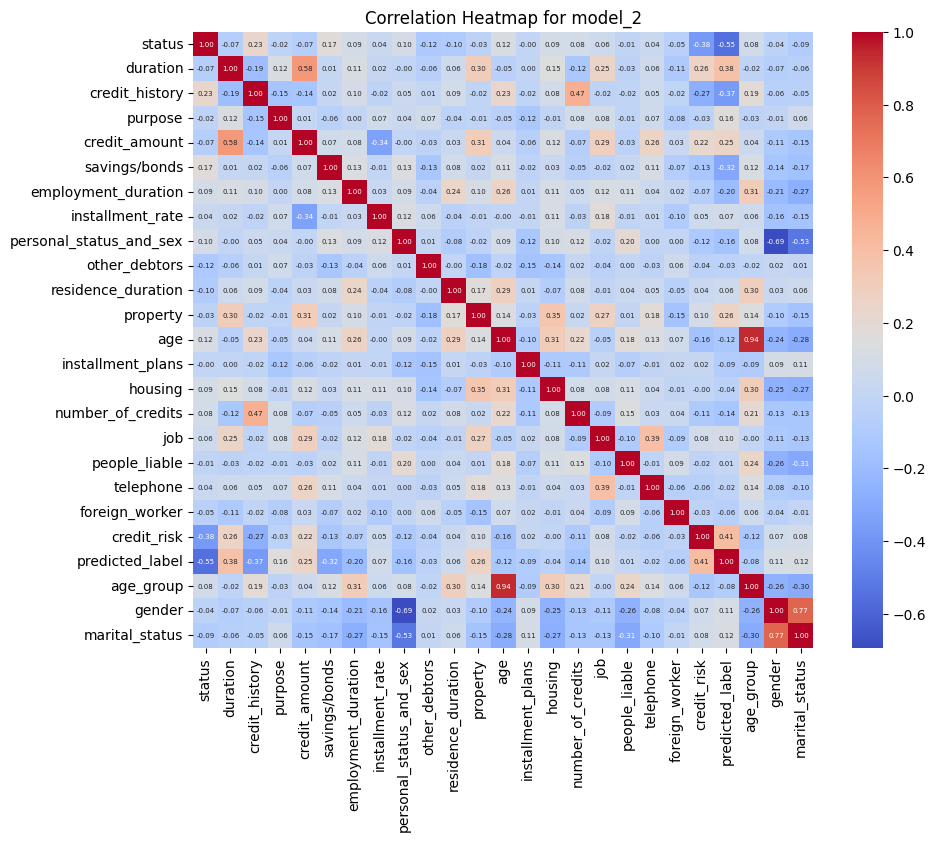

Correlation Analysis for model_3:
                    Feature  Absolute Correlation Correlation Sign
0           predicted_label              1.000000                +
1                    status              0.525753                -
2               credit_risk              0.398240                +
3            credit_history              0.343945                -
4                  property              0.264881                +
5             savings/bonds              0.257926                -
6                  duration              0.237796                +
7                       age              0.170625                -
8        residence_duration              0.153538                +
9          installment_rate              0.146616                +
10        installment_plans              0.137487                -
11      employment_duration              0.130279                -
12                age_group              0.124058                -
13           marital_status 

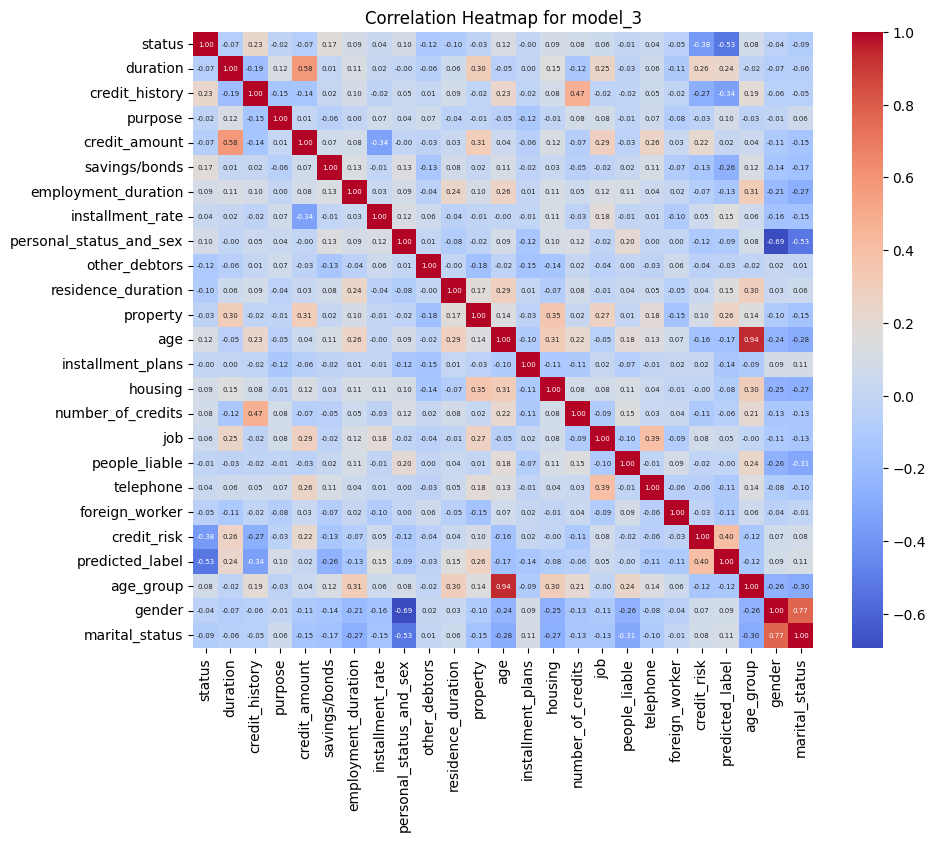

Correlation Analysis for model_4:
                    Feature  Absolute Correlation Correlation Sign
0           predicted_label              1.000000                +
1                    status              0.492717                -
2               credit_risk              0.397267                +
3            credit_history              0.355618                -
4                  duration              0.345372                +
5             savings/bonds              0.279106                -
6                  property              0.230867                +
7       employment_duration              0.209742                -
8         number_of_credits              0.195492                -
9                       age              0.131722                -
10  personal_status_and_sex              0.122100                -
11                  housing              0.120286                -
12       residence_duration              0.117968                +
13                   gender 

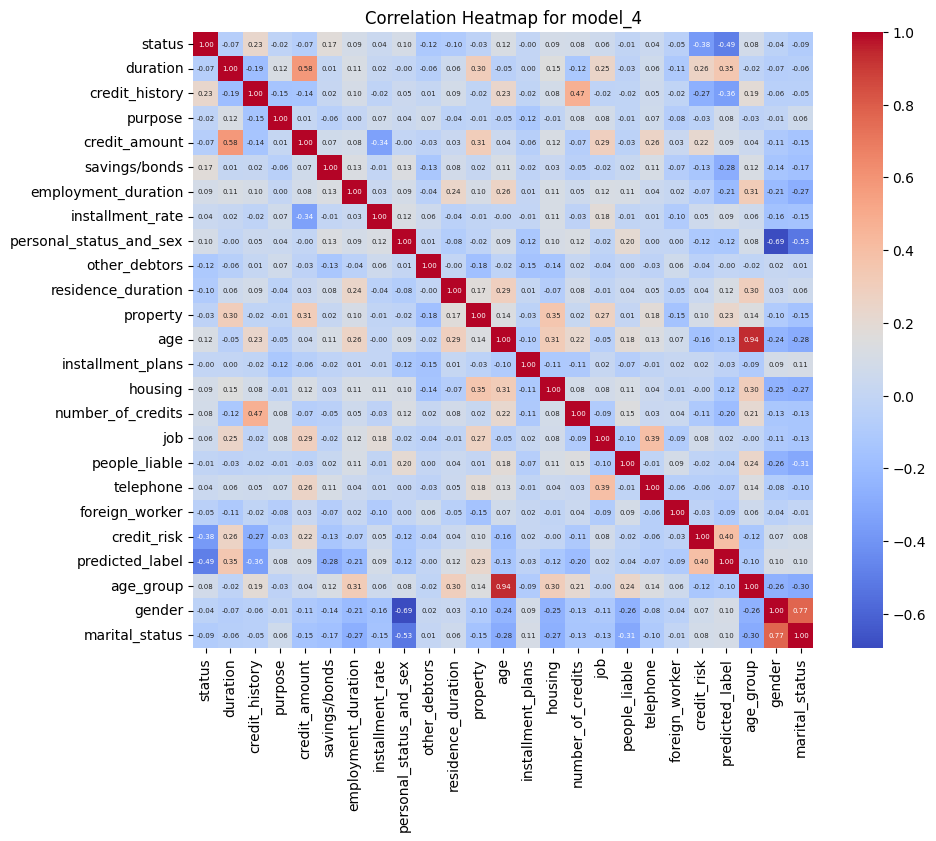

Correlation Analysis for model_5:
                    Feature  Absolute Correlation Correlation Sign
0           predicted_label              1.000000                +
1            credit_history              0.411737                +
2         number_of_credits              0.320375                +
3       employment_duration              0.256351                -
4             other_debtors              0.209135                +
5                  duration              0.134969                -
6                       job              0.120031                -
7                       age              0.109919                +
8                   purpose              0.098522                -
9                 telephone              0.095350                -
10            savings/bonds              0.090129                -
11        installment_plans              0.089799                -
12                  housing              0.081930                -
13            people_liable 

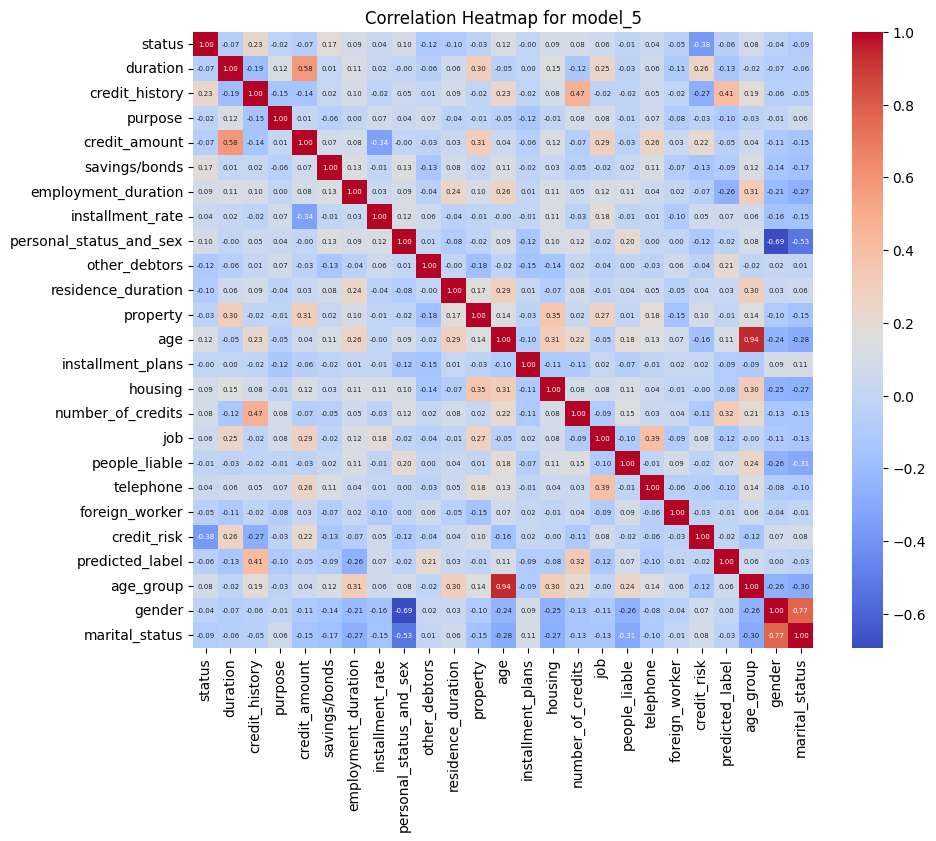

In [4]:
for dataset, name in zip(datasets, names):
    df = dataset
    df = df.drop(columns=['id'])

    correlations = df.corr()['predicted_label'].sort_values(ascending=False)
    correlation_matrix = df.corr()


    print(f"Correlation Analysis for {name}:")
    abs_correlations = correlation_matrix['predicted_label'].abs().sort_values(ascending=False)
    original_correlations = correlation_matrix['predicted_label']

    correlation_df = pd.DataFrame({
        'Feature': abs_correlations.index,
        'Absolute Correlation': abs_correlations.values,
        'Correlation Sign': ['+' if original_correlations[feature] >= 0 else '-' for feature in abs_correlations.index]
    })
    
    print(correlation_df, '\n')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 5})
    plt.title(f'Correlation Heatmap for {name}')
    plt.show()


## Mutual Information Analysis

Mutual Information Analysis for model_1:
                    Feature  Mutual_Info
0                    status     0.201861
20              credit_risk     0.079715
5             savings/bonds     0.068923
6       employment_duration     0.062838
1                  duration     0.050985
10       residence_duration     0.046767
4             credit_amount     0.044832
15        number_of_credits     0.038709
2            credit_history     0.035670
3                   purpose     0.032216
22                   gender     0.022392
12                      age     0.022388
23           marital_status     0.019521
11                 property     0.016717
13        installment_plans     0.003401
19           foreign_worker     0.000517
14                  housing     0.000000
9             other_debtors     0.000000
16                      job     0.000000
17            people_liable     0.000000
18                telephone     0.000000
8   personal_status_and_sex     0.000000
21              

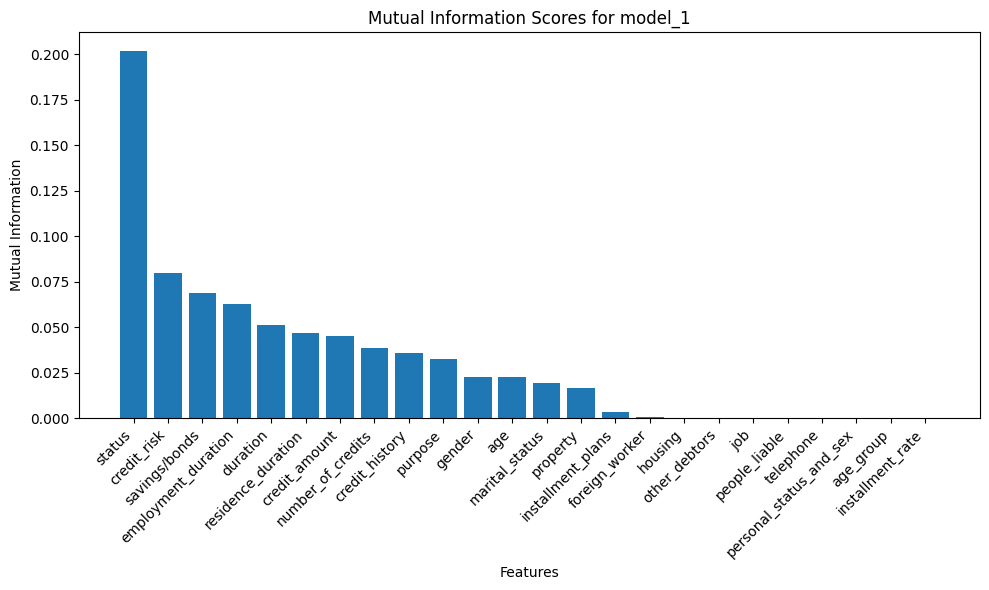

Mutual Information Analysis for model_2:
                    Feature  Mutual_Info
0                    status     0.178071
20              credit_risk     0.090865
1                  duration     0.047444
4             credit_amount     0.044832
2            credit_history     0.041863
18                telephone     0.037468
5             savings/bonds     0.033930
6       employment_duration     0.030542
23           marital_status     0.030515
11                 property     0.023040
21                age_group     0.016114
16                      job     0.013400
3                   purpose     0.011990
12                      age     0.009714
14                  housing     0.007072
10       residence_duration     0.006122
15        number_of_credits     0.003929
17            people_liable     0.000025
9             other_debtors     0.000000
8   personal_status_and_sex     0.000000
13        installment_plans     0.000000
7          installment_rate     0.000000
19           for

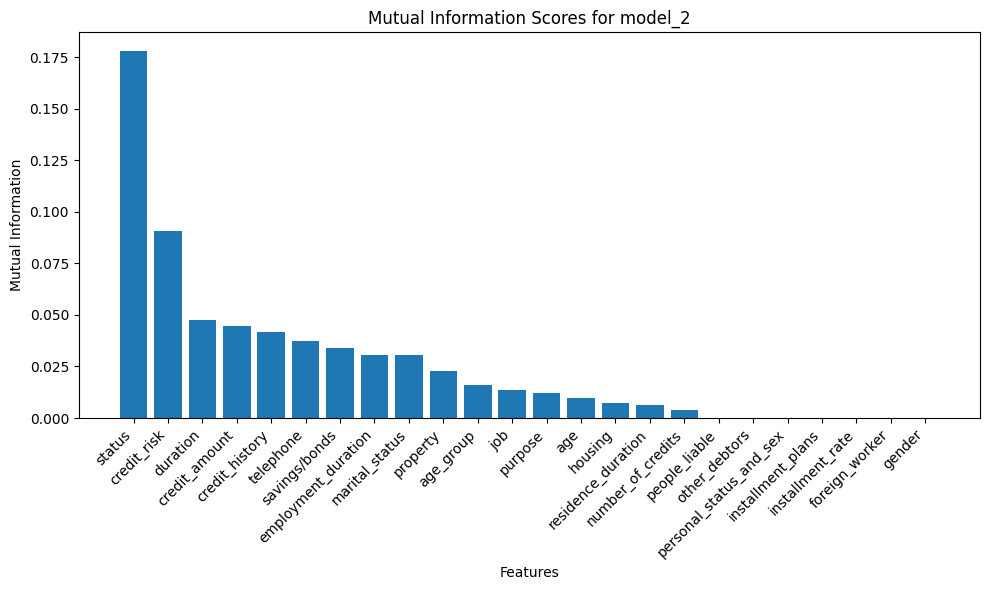

Mutual Information Analysis for model_3:
                    Feature  Mutual_Info
0                    status     0.181779
2            credit_history     0.070246
1                  duration     0.069187
10       residence_duration     0.064289
20              credit_risk     0.063095
5             savings/bonds     0.062208
7          installment_rate     0.060282
11                 property     0.055615
14                  housing     0.023563
23           marital_status     0.023349
12                      age     0.023196
6       employment_duration     0.012092
15        number_of_credits     0.006015
9             other_debtors     0.000000
8   personal_status_and_sex     0.000000
13        installment_plans     0.000000
4             credit_amount     0.000000
16                      job     0.000000
17            people_liable     0.000000
18                telephone     0.000000
19           foreign_worker     0.000000
3                   purpose     0.000000
21              

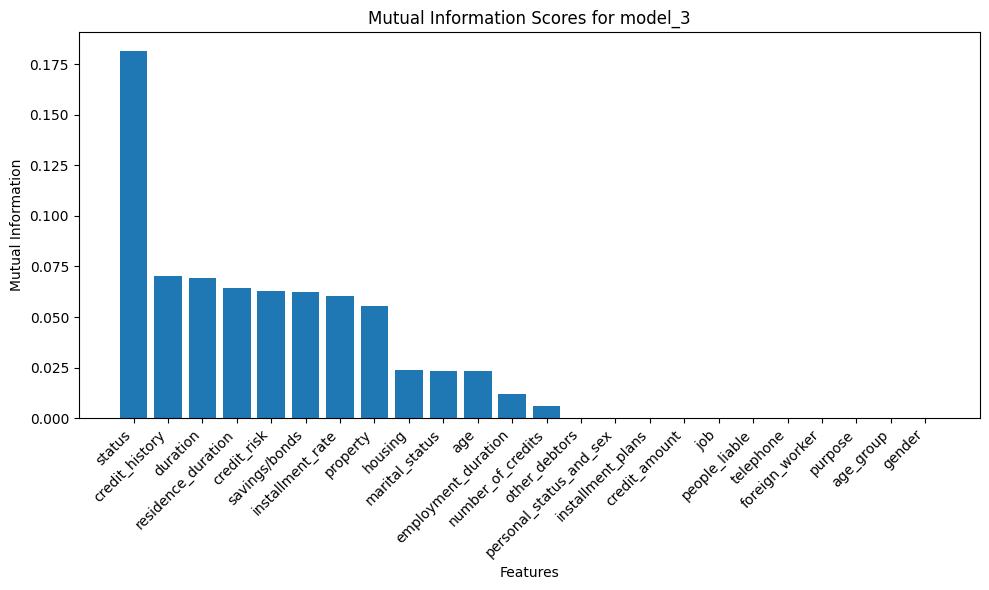

Mutual Information Analysis for model_4:
                    Feature  Mutual_Info
0                    status     0.127479
20              credit_risk     0.098442
1                  duration     0.090314
15        number_of_credits     0.063786
2            credit_history     0.051555
5             savings/bonds     0.043815
9             other_debtors     0.031969
6       employment_duration     0.028169
4             credit_amount     0.028083
3                   purpose     0.027832
22                   gender     0.023837
8   personal_status_and_sex     0.009895
11                 property     0.008812
19           foreign_worker     0.008157
13        installment_plans     0.005978
21                age_group     0.004312
18                telephone     0.003039
12                      age     0.000000
17            people_liable     0.000000
16                      job     0.000000
14                  housing     0.000000
10       residence_duration     0.000000
7          insta

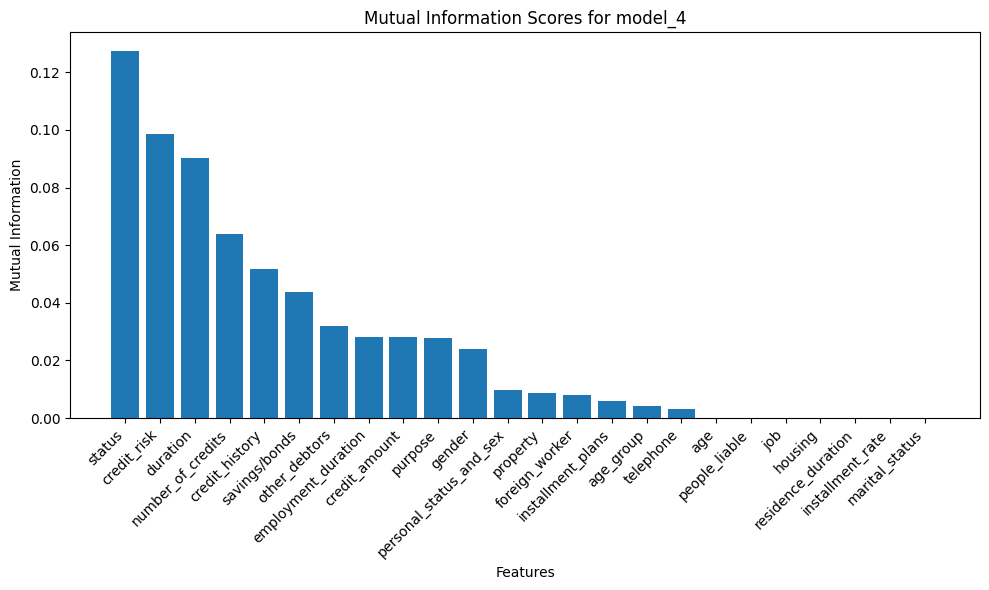

Mutual Information Analysis for model_5:
                    Feature  Mutual_Info
2            credit_history     0.159610
9             other_debtors     0.074964
6       employment_duration     0.066870
12                      age     0.052313
15        number_of_credits     0.033053
16                      job     0.027219
20              credit_risk     0.022790
13        installment_plans     0.017904
1                  duration     0.017719
17            people_liable     0.010184
4             credit_amount     0.006713
0                    status     0.000247
11                 property     0.000000
10       residence_duration     0.000000
14                  housing     0.000000
8   personal_status_and_sex     0.000000
7          installment_rate     0.000000
5             savings/bonds     0.000000
18                telephone     0.000000
19           foreign_worker     0.000000
3                   purpose     0.000000
21                age_group     0.000000
22              

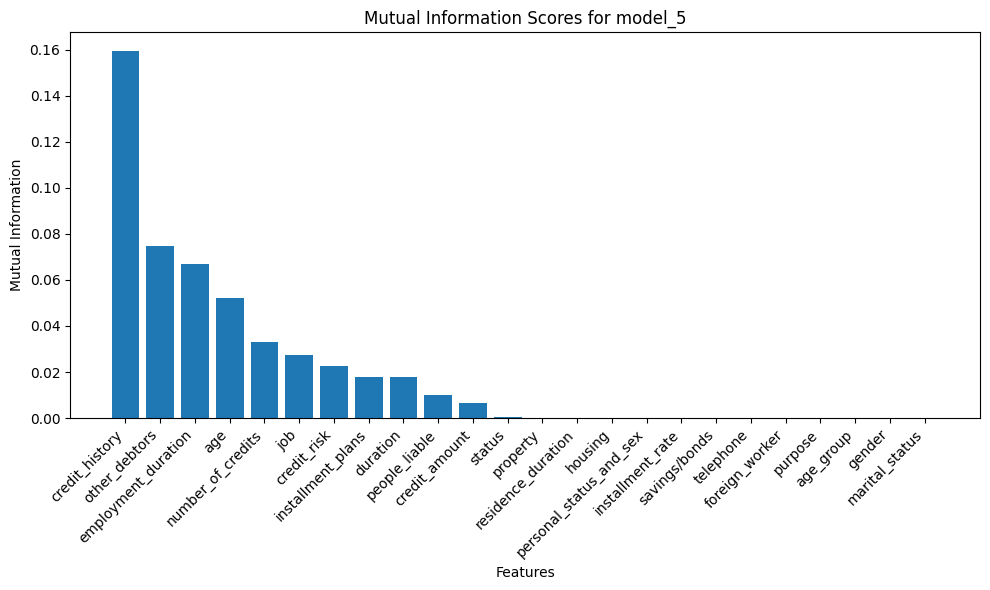

In [5]:
for dataset, name in zip(datasets, names):
    df = dataset
    df = df.drop(columns=['id'])

    X = df.drop(columns=['predicted_label'])
    y = df['predicted_label']

    mi_scores = mutual_info_classif(X, y, discrete_features='auto')
    mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi_scores}).sort_values(by='Mutual_Info', ascending=False)

    print(f"Mutual Information Analysis for {name}:")
    print(mi_df, '\n')
    
    plt.figure(figsize=(10, 6))
    plt.bar(mi_df['Feature'], mi_df['Mutual_Info'])
    plt.title(f"Mutual Information Scores for {name}")
    plt.xlabel('Features')
    plt.ylabel('Mutual Information')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

### Comparison of Correlation and Mutual Information

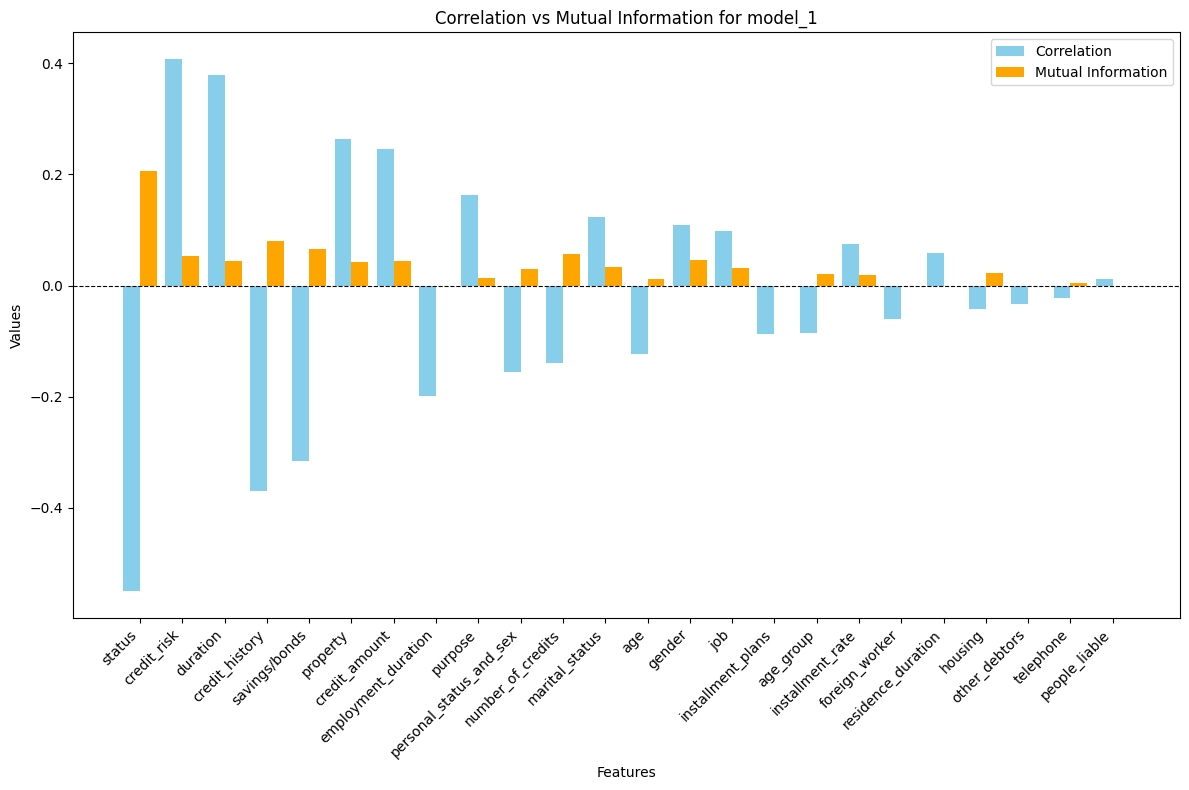

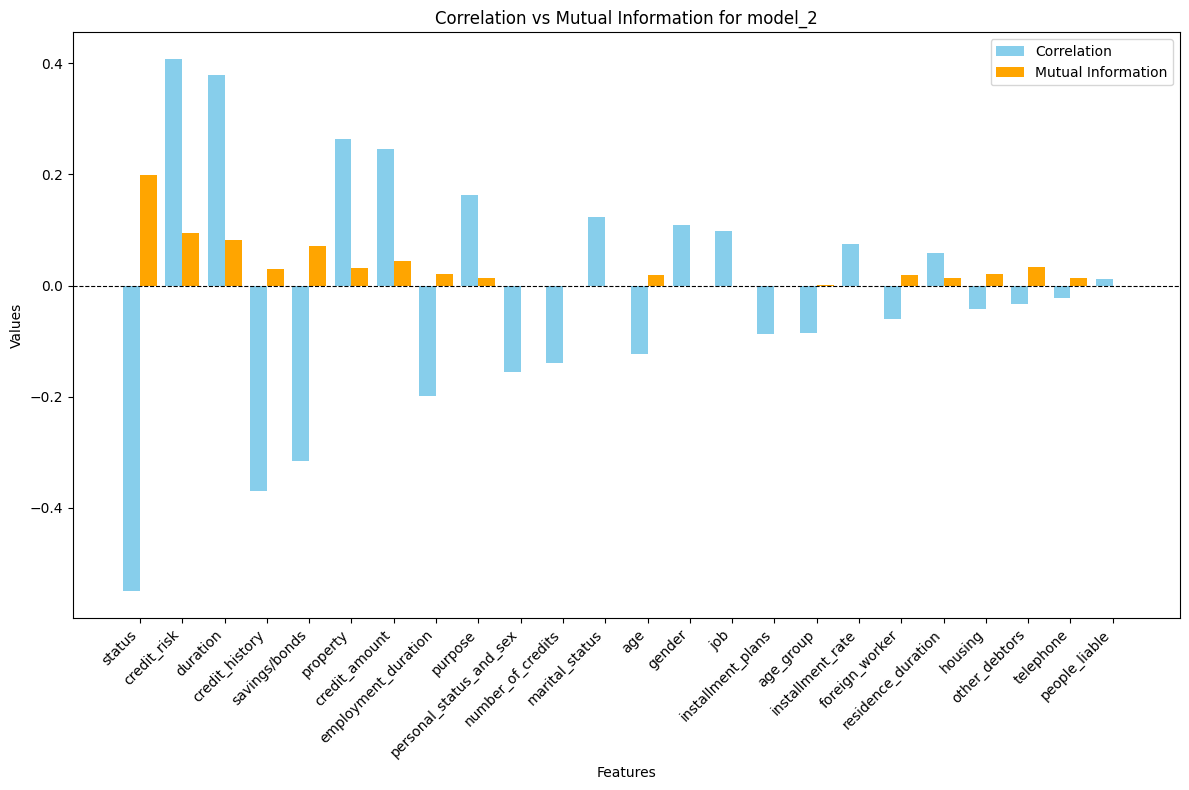

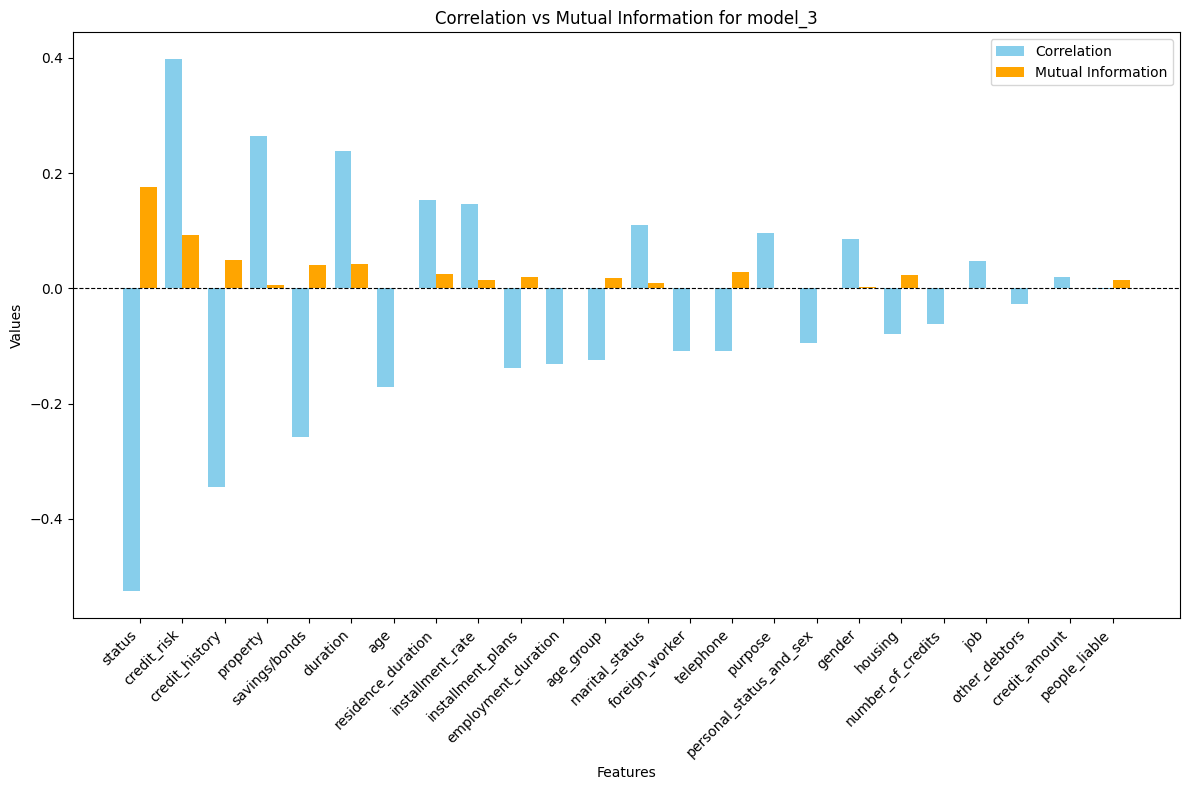

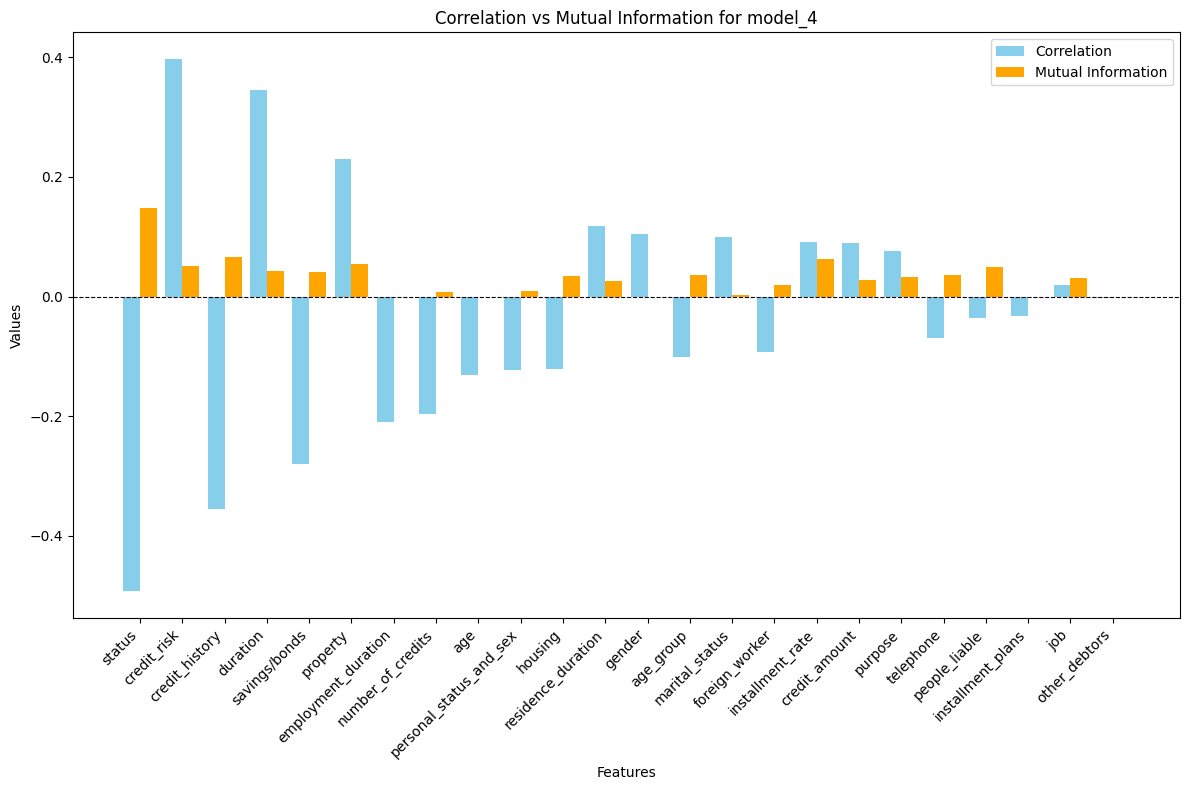

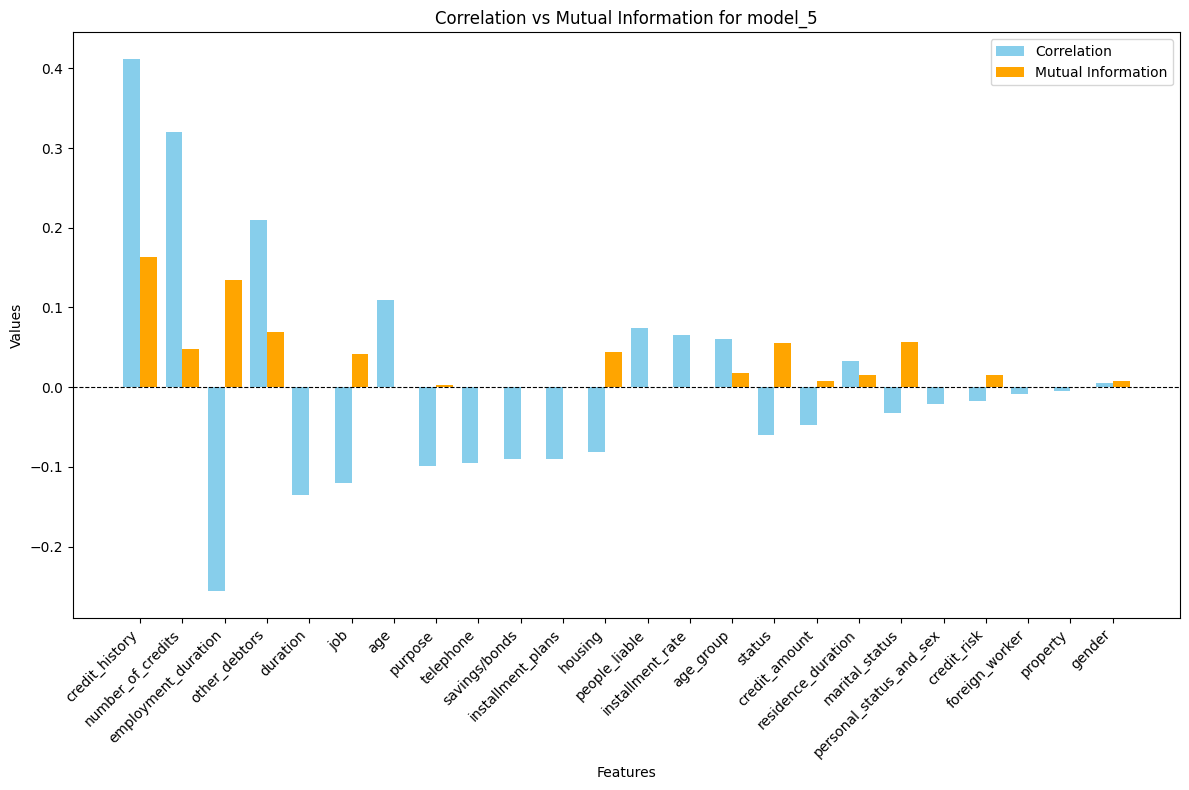

In [11]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

for dataset, name in zip(datasets, names):
    df = dataset
    df = df.drop(columns=['id'])

    # Correlation Analysis
    correlation_matrix = df.corr()
    correlations = correlation_matrix['predicted_label'].drop(labels=['predicted_label']).sort_values(key=np.abs, ascending=False)
    correlation_signs = ['+' if value >= 0 else '-' for value in correlations]

    correlation_df = pd.DataFrame({
        'Feature': correlations.index,
        'Correlation': correlations.values,
        'Correlation Sign': correlation_signs
    })

    # Mutual Information Analysis
    X = df.drop(columns=['predicted_label'])
    y = df['predicted_label']
    mi_scores = mutual_info_classif(X, y, discrete_features='auto')

    mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi_scores}).sort_values(by='Mutual_Info', ascending=False)

    # Merge Correlation and Mutual Information for plotting
    combined_df = correlation_df.merge(mi_df, on='Feature', how='left').sort_values(by='Correlation', key=np.abs, ascending=False)

    # Plot Combined Bar Plot
    plt.figure(figsize=(12, 8))
    bar_width = 0.4  # Width of the bars
    x = range(len(combined_df))  # Position of the bars on the x-axis

    # Plot Correlations
    plt.bar(
        x=[i - bar_width / 2 for i in x],
        height=combined_df['Correlation'],
        width=bar_width,
        label='Correlation',
        color='skyblue'
    )

    # Plot Mutual Information
    plt.bar(
        x=[i + bar_width / 2 for i in x],
        height=combined_df['Mutual_Info'],
        width=bar_width,
        label='Mutual Information',
        color='orange'
    )

    # Add feature labels and correlation sign to the x-axis
    plt.xticks(x, combined_df['Feature'], rotation=45, ha='right')

    # Add labels, title, and legend
    plt.title(f"Correlation vs Mutual Information for {name}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a zero-line for correlation
    plt.legend()
    plt.tight_layout()
    plt.show()
